# Introduction to Probability

If you work in some tech companies or just randomly join get-togethers or hackathons, you may overhear a saying that "A data scientist is better at statistics than any software engineer". All of a sudden, the keyword statistics come across your mind on the lunch meeting chat instead of parallel computing or Red Hat Openshift projects. Now Probability distributions are fundamental to statistics, just like data structures and algorithms are fundamental to computer science. There are more than a hundred of probability distributions in the world, but only around 20 distributions turn up consistently used in practical problems, other may sound like a legend such as the Muth distribution (Interestingly, Muth can serve as a shorthand of Frankenmuth, a quintessential German town in Michigan). It's far beyond the scope of this Bayesian statistics course anyway. In this lecture, we are going to discuss some probability concepts and develop Python code to generate common probability distributions and calculate key statistics. 

As usual, you will be able to see this live coding demonstration on Jupyter Notebook. If you want to see the code, please go to the lab section and access tutorial files (those end with .ipynb) in the Coursera shell. So let's begin.

So what's a probability distribution? Probability uses mathematics to quantify uncertainty for events or processes with unknown outcomes. Probability distribution describes the probability of each outcome is, which is really more interesting than knowing the likeliness of a single outcome. Different probability distributions come in many shapes.

Consider a process with unknown outcome, like flipping or rolling a die. If we are not sure of the outcome, we can use probability to model such processes as random processes.
If I roll a fair six-sided die and look at the result, then the set of all possible outcomes are 1, 2, 3, 4, 5 and 6. This set of all possible outcomes is called the **sample space** of an experiment. Suppose we want to see an odd number, then the **event** is defined as the subset of the sample space where the number is odd. In this case, it's 1, 3 and 5. Next, the **outcome** of the experiment is either a yes or a no. If we obtain a 1, 3 or 5 in a roll, then the outcome is yes; in this case, we say the **event** occurs. Otherwise, the outcome is no, and we say the event does not occur.

So what is the probability of getting the number 3 if we roll the die? This is 1/6 since each of the six numbers has the same chance for a fair six-sided die. And what is the probability of getting the number 3 given that we have obtained an odd number? This is 1/3, because if we know we have an odd number, the only possible numbers are 1, 3, 5, and each of them has the same chance. Finally, what is the probability of getting the number 3 given that we obtained an odd number? This is 0, because if we know the number is even, then the only possible ones are 2, 4 and 6, and thus getting a 3 is not possible.

Now we understand the probability with respect to the rolling die example. 

(Optional Examples) Under this definition of probability, it is totally valid and natural to ask about the probability of life on Mars, the probability of tomorrow being a rainy day in Ann Arbor, or the probability of more than 20 students in a 50 students math class obtaining A and A+ score in the examination. We may further ask how likely that Ann Arbor will receive between 0.5 to 1 inches of rain tomorrow, how likely for different number of students excel in the class and receive A or A+. These questions all boil down to understanding the probability distribution of all possible events.

It's important to notice that life on Mars either exists or does not exist; so the question about the probability of life on Mars turns out to be a yes-no question, which means that the outcome is binary, yes or no. But given that we are not sure about that fact, in this case a pragmatic way of action is trying to collect data and consult expert opinions to figure out a probability distribution regarding how likely life on Mars is. 



Let's get back to the simple casino case and do some coding.



In [ ]:
# Let's import standard libraries such as numpy as np
import numpy as np
# pandas as pd
import pandas as pd
# visualization tool seaborn
import seaborn as sns
# and scipy library to analyze classical probabilistic problems
from scipy import stats
# Before even start, we want to provide a seed using np.random.seed To make the random numbers predictable, we set a seed in np.random.seed
np.random.seed(0)

**(Optional Explanation)** When you use a seed, the machine will give you the same set of numbers every time. The process of generating those numbers is quite complicated and is out of the scope of this course, but when a pseudo-random number is generated, it will be used as the seed to generate the next random number. That's exactly why setting seed can render the system generate the same results every time. Random number is useful for many kinds of analysis, a prominant one being Monte Carlo simulation, a simulation techniques that Bayesian statisticians would heavily rely on.

In [ ]:
# Let's pretend that you're going to a casino and play a slot machine. It's a very simple machine that you'll either win or lose.
# There is nothing in between. If you win, the prizes are always the same; you'll gain the money you bet. Otherwise, you lose the money you bet.
# So, we can define a function using the def keyword to determine win and loss for each game

def win_or_lose(win_prob):
    # We'll take in one user input: the winning probability
    # and we'll randomly generate a number called dice with uniform probability from 0 to 1 using stats.uniform.rvs passing through 0 and 1 as arguments
    dice = stats.uniform.rvs(0,1)

    # If the number is less than the winning probability you provide, then the player wins the game
    if dice <= win_prob:
        # the function returns True
        return True
    # Otherwise, the house wins the game (the player loses)
    elif dice > win_prob:
        # and the function returns False
        return False
# So a True value now indicates the player wins the game, while False indicates the player loses the game.

# We then simulate the action of playing the slot machine. 
def play_machine(credit, bet_amount, total_games, win_prob):
    '''For each time the player runs the machine, the machine will take in player's initial credit, the money you bet for one game as parameters, 
    and let you know if you win or lose the game based on the last function. 
    At the end of the game, your total credit will be updated based on the result (win/loss).
    User can specify how many games you are going to play the machine in the third parameter total_games'''
    
    # To record the game id for each game, we create a list variable called game_id
    game_id = []
    # Next, we create a list variable called updated_credit to save how much credit the player remains after each game played
    updated_credit = []

    game = 1
    # Now we start to iterate the total number of games we specify
    while game <= total_games:
        # Each time when we win (that is, the function returns True)
        if win_or_lose(win_prob):
            # we'll add the amount of money we win to total credit
            credit = credit + bet_amount
            # and save the current credit you have
            updated_credit.append(credit)
            # We also need to save the game into a list to make visualization easy
            game_id.append(game)
        else:
            # Otherwise if we lose, we'll subtract the amount of money we lose from total credit
            credit = credit - bet_amount
            # and save the current credit and save the game number
            updated_credit.append(credit)
            game_id.append(game)
        game = game + 1
    return(game_id, updated_credit) 

<AxesSubplot:>

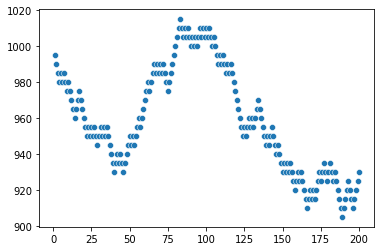

In [ ]:
# Now we can simulate a player taking some credits in hand (let's say $1000), and make each bet some amount (let's say $5)
# for total number of games (let's say 200) and the win_odds probability depending on the nature of the game (let's say 0.47)
# The function will return the final updated credit after playing all games using the winning probability.
# Lets try a simulation to get a good sense of how the gambler's money changes over the number of game played.

game_id, updated_credit = play_machine(1000, 5, 200, 0.47)

# We can use a scatterplot to visualize the trajectory of player's credit versus the number of games played
sns.scatterplot(x = game_id, y = updated_credit)
# At the first glance, you see the player lost money in his bets because the trajectory went downward as x increases.

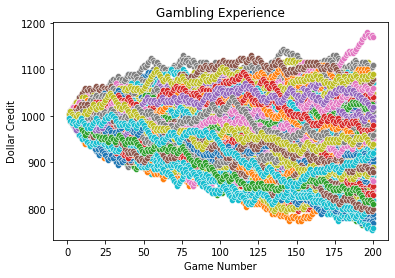

In [ ]:
# But we only ran one simulation, and it's far from conclusive, so we need more simulations.
# If we want to summarize the gambling patterns, we can visualize the trajectory of multiple gamblings.
# Same as above, the scatterplot using sns.scatterplot is a fantastic choice to show the trend of the 
# final credit the player have after playing multiple games (200 games here).
final_credit = []

# Let's try to draw 500 simulations
for x in range(1, 501):
    # For each simulation, the player start with $1000 and bet $5 each time unchangably
    # Let's play 200 games with winning probability 0.47
    game_id, updated_credit = play_machine(1000, 5, 200, 0.47)
    # and record the final credit for each game. This step allows you to compute mean, variance and other statistics later on.
    final_credit.append(updated_credit[-1])
    # Now we use a scatterplot to record each experience of playing the slot machine, each of the 200 trajectories will overlay atop the other
    sns.scatterplot(x = game_id, y = updated_credit).set(title = "Gambling Experience", xlabel = "Game Number", ylabel = "Dollar Credit")
# In this graph it is very likely that you will see downward trend for player's gambling experiences.
# Remember that the player owns $1000 initially, so when you see most trajectory goes downward, you can infer that most of the 
# time the player loses money at the end, which is kind of a painful experience. Of course the player loses money because I set the 
# winning probability for each slot game as 0.47, which is less than 0.5 or a half. 
# Nevertheless, it's typically the similar case for casino slot machine setting. 

[Text(0.5, 0, 'Final Credit')]

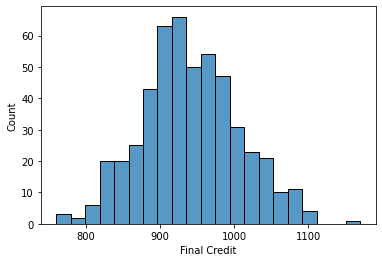

In [ ]:
# To make it clear how much the player won or lost during the game, we can instead make a histogram to 
# show the distribution of the final credit the player owns
sns.histplot(final_credit).set(xlabel = "Final Credit")
# Cool! The histogram shows that the player is most likely to have around 900 to 950 dollar at the end of
# 200 games. Starting with $1000, it means the player is likely to lose between 50-100 dollars after playing 200 games,
# which is about 5-10 percent of the initial credit. 
# What is really interesting is that the graph looks pretty much like a bell-shape, which is actually the
# most prominent characteristic of a normal distribution. Let's investigate the distribution of final credit further.

In [ ]:
# We can calculate the Mean, Mode, Median and variance of the final credits in the simulation. Those are common
# summary statistics to describe distributions. 

# We first sum over all values in the final_credit list using the sum function, and divide the sum by the length of the list
# to get the average final credit. 
mean_final = sum(final_credit)/len(final_credit)
# For the variance, we can take the squared sum of the final credit subtracted by its mean value 
variance_final = sum([((x - mean_final) ** 2) for x in final_credit]) / len(final_credit)
# We can take the square root of the variance to calculate the standard deviation of player's final credit
std_final = variance_final ** 0.5

# To compute the median is a little bit complex. You can sort all of the final credit from smallest to largest,
# and then find the middle numbers using the index cut by half. 
# The median is the middle number in the list using the formula: median = (median1 + median2)/2
median_final = (sorted(final_credit)[len(final_credit)//2 - 1] + sorted(final_credit)[len(final_credit)//2]) / 2

# The mode is the number that occurs most often within a set of numbers. 
mode_final = max(set(final_credit), key=final_credit.count)

# And maximum plus minumum possible amount in the simulation!
min_final = min(final_credit)
max_final = max(final_credit)

# Now you have a complete list of descriptive statistics, you just need to print those values
# out with a simple print statement.
print("The player starts the game with $1000 and ends with an average of $" + str(mean_final))
print("The player starts the game with $1000 and ends with the median credit $" + str(median_final))
print("The player most likely to remain " + str(mode_final) + " credit dollars")
print("The standard deviation is $" + str(std_final))
print("The minimum and maximum funds that a player can possible end with are: {} and {}".format(min_final,max_final))

The player starts the game with $1000 and ends with an average of $940.92
The player starts the game with $1000 and ends with the median credit $940.0
The player most likely to remain 920 credit dollars
The standard deviation is $67.12044099974312
The minimum and maximum funds that a player can possible end with are: 760 and 1170


/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

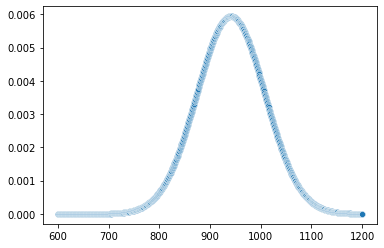

In [ ]:
# One characteristics that defines a normal distributed random variable is that it has the same mean, median and mode.
# So when you see the mean, median and mode of player's final credit is so closed to each other, we can conclude that
# the average final credit the player left after 200 games follows approximately normal distribution. 

# Let's verify the histogram to see if that follows the normal distribution.
# It's a great practice to create equally spaced sequence of number, from 600 and 1200, for 1000 numbers
x = np.linspace(600, 1200, 1000)
# and plot the theoretical normal distribution taking the mean and standard deviation from the simulated results.
sns.scatterplot(x, stats.norm.pdf(x, mean_final, std_final))

# sns.histplot(final_credit)

# Now these two graphs are reasonably resembling each other, so we are confident to say the the average final credit the 
# player remains follows approximately normal distribution.
# However, this statement does not indicate that the actual population distribution of slot machine gambling is normal. 
# When we simulate the gambling 100 times, the sample we get is large enough so that the mean value 
# of the distribution becomes approximately normal, as shown in the histogram.
# This seemingly strange argument makes statistical world much easier to interpret the statistics from the sample
# and overcome the problem that the data belonging to the population is actually not normal. This concept is called the 
# Central Limit Theorem. We'll cover this later at the normal distribution lecture, saying that for large sample sizes, 
# the sampling distribution of means will approximate to normal distribution even if the population distribution is not normal.

# You can of course use numpy to get these statistics in more straightforward way, but since those summary statistics
# must have wide applications on interpreting models in subsequent Bayesian models, make sure you will understand
# how to derive mean, variance, mode and median from scratch. Cool!

Up till now we have discuss some important concepts of probability. Let's recap! Probability uses mathematics to quantify uncertainty for events or processes with unknown outcomes. Probability distribution describes the probability of each outcome is. In a bit sleuthing, we also have seen how to compute calculate the mean, standard deviation, median, mode, maximum and minimum given some data. We even looked at the statement of Central Limit Theorem at the first glance.

Here's your challenge! Some gambler experts claim that Blackjacks is one of the games that have highest odds in our favor 
compared to other casino games. Do you believe that? I invite you to think probabilistically and try coding yourself and share your code among the peers. See you in the next video!

In [ ]:
# Appendix 1: A paper on Muth Distribution
# https://www.researchgate.net/publication/279164529_On_the_Muth_Distribution

In [ ]:
# Appendix 2: Blackjack variance
# https://wizardofodds.com/games/blackjack/variance/

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d164461f-c4b7-4df2-b711-3a9e5e978d4a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>